In [16]:
%load_ext autotime
import numpy as np
from keras.layers import Input, Dense, Conv1D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 997 µs


In [25]:
a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
x.shape
x_test=x[700:]
x=x[:700]

39963.59
time: 2.48 s


In [37]:
encoding_dim = 10
 
# this is our input placeholder
input_img = Input(shape=(250,))
# "encoded" is the encoded representation of the input
encoded0=Dense(125,activation='linear')(input_img)
encoded1=Dense(60,activation='linear')(encoded0)
encoded = Dense(encoding_dim, activation='linear')(encoded1)
# "decoded" is the lossy reconstruction of the input
decoded0=Dense(60,activation='linear')(encoded)
decoded1=Dense(125,activation='linear')(decoded0)
decoded = Dense(250, activation='linear')(decoded1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (10-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]
# create the decoder model
decoder_layer1 = autoencoder.layers[-1]
decoder_layer2 = autoencoder.layers[-2]
encoded_input1 = Input(shape=(125,))
encoded_input2 = Input(shape=(60,))
decoder1 = Model(encoded_input1, decoder_layer1(encoded_input1))
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mse')#binary_crossentropy

time: 125 ms


In [38]:
autoencoder.fit(x,x,
epochs=50,
batch_size=10)

Epoch 1/50
700/700 [==============================] - 1s 1ms/step - loss: 34155.4989
Epoch 2/50
700/700 [==============================] - 0s 366us/step - loss: 18103.1030
Epoch 3/50
700/700 [==============================] - 0s 362us/step - loss: 15975.1233
Epoch 4/50
700/700 [==============================] - 0s 365us/step - loss: 15598.0139
Epoch 5/50
700/700 [==============================] - 0s 368us/step - loss: 15546.7186
Epoch 6/50
700/700 [==============================] - 0s 362us/step - loss: 15614.3273
Epoch 7/50
700/700 [==============================] - 0s 362us/step - loss: 15294.2787
Epoch 8/50
700/700 [==============================] - 0s 355us/step - loss: 15339.7564
Epoch 9/50
700/700 [==============================] - 0s 362us/step - loss: 15294.6871
Epoch 10/50
700/700 [==============================] - 0s 352us/step - loss: 15327.5284
Epoch 11/50
700/700 [==============================] - 0s 353us/step - loss: 15280.5789
Epoch 12/50
700/700 [======================

time: 13.5 s


In [39]:
encoded_layer=encoder.predict(x_test)
decoded_output1=decoder.predict(encoded_layer)
decoded_output2=decoder2.predict(decoded_output1)
# create the decoder model
decoded_output2=decoder1.predict(decoded_output2)


time: 406 ms


In [40]:
encoded_layer[0]

array([-396.79172 ,  -21.431469,  -18.771603,  380.02386 ,  119.07594 ,
        298.1998  ,  597.38605 ,   53.285686,  245.38861 ,   74.91307 ],
      dtype=float32)

time: 1.98 ms


In [41]:
print(x[0].shape)
print(decoded_output2[0].shape)

(250,)
(250,)
time: 7.98 ms


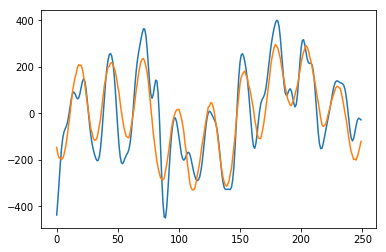

time: 121 ms


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
q=4
plt.plot(range(250),x_test[q],label=1)
plt.plot(range(250),decoded_output2[q],label=2)

In [49]:
np.savetxt('compressed_data.csv',encoded_layer,delimiter=',')

time: 13 ms


In [ ]:
for layer in autoencoder.layers:
    weights = layer.get_weights()

In [11]:
weights=np.array(weights)
#weights[1]

time: 1e+03 µs


In [22]:
config=autoencoder.get_config()
#print(config['layers'])
for layer in config['layers']:
    print(layer)

{'name': 'input_5', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 250), 'dtype': 'float32', 'sparse': False, 'name': 'input_5'}, 'inbound_nodes': []}
{'name': 'dense_7', 'class_name': 'Dense', 'config': {'name': 'dense_7', 'trainable': True, 'units': 125, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'inbound_nodes': [[['input_5', 0, 0, {}]]]}
{'name': 'dense_8', 'class_name': 'Dense', 'config': {'name': 'dense_8', 'trainable': True, 'units': 60, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_in

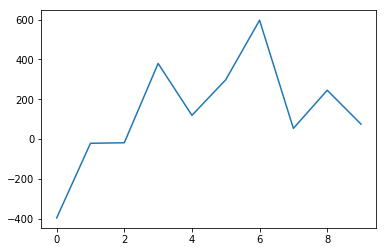

time: 115 ms


In [48]:
plt.plot(range(10),encoded_layer[0])
plt.plot